In [2]:
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as ss

## NumPy

NumPy is a Python library used for scientific computing, numerical linear algebra and vectorized operations. The pythonic modules are actually backed by high-performance C++/C scripts which allow the code to process large datasets and high-dimensional data significantly faster than native python. One of the main advantages of NumPy is that there is built in support for broadcasting adn vectorizing, which essentially allows us to avoid time-consuming and computationally expensive for loops. This is especially important for modeling, simulation and Machine Learning. 

### Working with Arrays

In [39]:
## arbitrary matrix 
A = np.asarray([
    [1, 2, 3],
    [2, 3, 5],
    [7, 8, 10]
])
A

array([[ 1,  2,  3],
       [ 2,  3,  5],
       [ 7,  8, 10]])

In [ ]:
matrix = np.asarray([
    [1, 1, 1],
    [2,2,2]
])

In [ ]:
np.array(matrix)

In [40]:
## zero matrix
zero_matrix = np.zeros((3,4), dtype=np.float64)
zero_matrix

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [43]:
## identity matrix
ones_matrix = np.eye(10, dtype=np.float64)
ones_matrix

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### Indexing and Slicing

In [44]:
M = np.asarray([
    [1, -1, 3, 4, 8, 10],
    [2, 3, -1, 2, 3, 4],
    [7, -1, 10, 4, -1, 0]
])

In [51]:
M

array([[ 1, -1,  3,  4,  8, 10],
       [ 2,  3, -1,  2,  3,  4],
       [ 7, -1, 10,  4, -1,  0]])

In [46]:
## slicing an individual element: M[row, col]
M[2, 3]

np.int64(4)

In [47]:
## selecting subsets: M[specify rows, specify columns]
M[1:, 3:]

array([[ 2,  3,  4],
       [ 4, -1,  0]])

### Boolean Filtering

In [49]:
eigenvalues = np.array([2.5, 0.1, -0.001, 4.0])

In [50]:
mask = (eigenvalues > 2) | (eigenvalues < 0) ## the rule we're following
eigenvalues[mask]

array([ 2.5e+00, -1.0e-03,  4.0e+00])

In [ ]:
## (condition 1) & (condition 2)

In [52]:
## masking matrices 
filtered_matrix = np.where(M < 0, 0, M)
filtered_matrix

array([[ 1,  0,  3,  4,  8, 10],
       [ 2,  3,  0,  2,  3,  4],
       [ 7,  0, 10,  4,  0,  0]])

In [53]:
## only keep columns where the first row < 5 
mask = M[0, :] < 5
M[:, mask]

array([[ 1, -1,  3,  4],
       [ 2,  3, -1,  2],
       [ 7, -1, 10,  4]])

### Fancy/Advanced Indexing

In [54]:
## we can reorder rows or columns in a matrix 
## suppose we have a matrix and want to shuffle the vectors around 

M = np.array([
   [11, 12, 13],
   [21, 22, 23],
   [31, 32, 33]
])

In [55]:
new_indices = [0, 2, 1]
print(M[new_indices, :])
print()
print(M[:, new_indices])

[[11 12 13]
 [31 32 33]
 [21 22 23]]

[[11 13 12]
 [21 23 22]
 [31 33 32]]


In [ ]:
M

In [58]:
original = np.array([0, 1, 2, 3, 4, 5])

# Case A: Basic Slicing
view_slice = original[0:3]
view_slice[0] = 999 

# Case B: Fancy Indexing (The Trap)
copy_slice = original[[0, 1, 2]]
copy_slice[1] = 888

# Q: What does 'original' look like now?
print(original)

[999   1   2   3   4   5]


### Creating random matrix

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  1.,  2.,  2.,  4.,  6.,  4.,  5.,
        11.,  8., 12., 14., 21., 22., 16., 19., 26., 23., 27., 27., 23.,
        21., 26., 20., 12., 26., 24., 16., 16., 10.,  7.,  7., 14.,  8.,
         2.,  3.,  2.,  2.,  2.,  3.,  0.,  1.,  1.,  1.,  1.]),
 array([-3.13781858, -3.01184702, -2.88587545, -2.75990388, -2.63393231,
        -2.50796074, -2.38198917, -2.25601761, -2.13004604, -2.00407447,
        -1.8781029 , -1.75213133, -1.62615977, -1.5001882 , -1.37421663,
        -1.24824506, -1.12227349, -0.99630192, -0.87033036, -0.74435879,
        -0.61838722, -0.49241565, -0.36644408, -0.24047251, -0.11450095,
         0.01147062,  0.13744219,  0.26341376,  0.38938533,  0.51535689,
         0.64132846,  0.76730003,  0.8932716 ,  1.01924317,  1.14521474,
         1.2711863 ,  1.39715787,  1.52312944,  1.64910101,  1.77507258,
         1.90104414,  2.02701571,  2.15298728,  2.27895885,  2.40493042,
         2.53090199,  2.65687355,  2.78284512,  2.90881669,

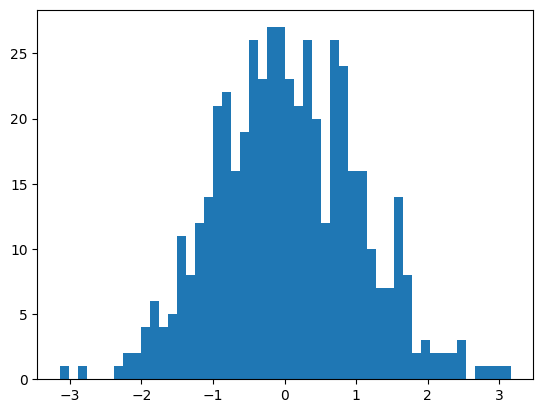

In [59]:
## np.random.distribution_name((m,n), dtype=<...>)
D = np.random.standard_normal(size=(500,500))
plt.hist(D[0, :], bins=50)

### Array-Oriented Programming: Vectorization

In [60]:
A = np.random.uniform(size=(5000,5000))

In [61]:
## Applying a function to a matrix

def f(x):
    return np.sin(x)

In [62]:
## slow way
M, N = A.shape
for i in range(M):
    for j in range(N):
        A[i, j] = f(A[i, j])
A

array([[0.5096213 , 0.67208898, 0.19690033, ..., 0.17433071, 0.4333357 ,
        0.74527114],
       [0.22498044, 0.68672331, 0.42582345, ..., 0.01922587, 0.40790787,
        0.62089878],
       [0.34675394, 0.72302761, 0.79177709, ..., 0.3271169 , 0.48681502,
        0.77252501],
       ...,
       [0.80479483, 0.68442849, 0.83989814, ..., 0.1988996 , 0.38779826,
        0.48982843],
       [0.58054337, 0.38094874, 0.74665446, ..., 0.48370802, 0.32244205,
        0.77676328],
       [0.19325672, 0.74424854, 0.13299531, ..., 0.39965484, 0.57584206,
        0.20737835]], shape=(5000, 5000))

In [63]:
## fast way
f(A)

array([[0.4878467 , 0.62262202, 0.1956305 , ..., 0.17344903, 0.41990052,
        0.6781711 ],
       [0.22308729, 0.63400664, 0.41307083, ..., 0.01922469, 0.39668972,
        0.58176642],
       [0.33984675, 0.66165782, 0.71160295, ..., 0.32131415, 0.46781329,
        0.69794575],
       ...,
       [0.72068842, 0.63223032, 0.74457513, ..., 0.19759075, 0.37815109,
        0.4704745 ],
       [0.54847836, 0.37180136, 0.67918706, ..., 0.46506499, 0.3168837 ,
        0.70097471],
       [0.192056  , 0.67741923, 0.1326036 , ..., 0.38910041, 0.54454125,
        0.20589513]], shape=(5000, 5000))

In [64]:
A ** 2

array([[2.59713871e-01, 4.51703599e-01, 3.87697406e-02, ...,
        3.03911953e-02, 1.87779832e-01, 5.55429071e-01],
       [5.06161969e-02, 4.71588906e-01, 1.81325609e-01, ...,
        3.69634217e-04, 1.66388833e-01, 3.85515290e-01],
       [1.20238297e-01, 5.22768925e-01, 6.26910963e-01, ...,
        1.07005468e-01, 2.36988861e-01, 5.96794889e-01],
       ...,
       [6.47694717e-01, 4.68442358e-01, 7.05428892e-01, ...,
        3.95610522e-02, 1.50387492e-01, 2.39931890e-01],
       [3.37030599e-01, 1.45121939e-01, 5.57492886e-01, ...,
        2.33973448e-01, 1.03968876e-01, 6.03361197e-01],
       [3.73481607e-02, 5.53905895e-01, 1.76877536e-02, ...,
        1.59723991e-01, 3.31594083e-01, 4.30057780e-02]],
      shape=(5000, 5000))

### Broadcasting 

In [69]:
## difference between (10,) and (10, 1)

M1 = np.array([1, 2, 3])
M2 = np.array([
    [1],
    [2],
    [3]
])

In [71]:
M1.shape

(3,)

In [72]:
M2.shape

(3, 1)

In [73]:
M_to_add = np.ones((3,5))
M_to_add

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [74]:
M_to_add + M1

ValueError: operands could not be broadcast together with shapes (3,5) (3,) 

In [75]:
M_to_add + M2

array([[2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.]])

In [79]:
M1.reshape((3,1))

array([[1],
       [2],
       [3]])

### Linear Algebra 

In [80]:
## matrix operations 
G = np.random.standard_normal(size=(10,10))
b = np.random.standard_normal(size=(10,))

In [83]:
G @ b

array([ 0.39894995, -3.46043844,  2.16527383,  0.77546335,  2.67932269,
       -1.54136907, -0.91080636, -2.39159722, -0.98136794,  5.98352774])

In [84]:
np.dot(b, b)

np.float64(7.836363254810691)

In [87]:
values = np.linalg.diagonal(G)
values

array([ 1.0089448 ,  0.96362049,  1.55869744, -0.23697321, -0.09879464,
       -1.66888266, -0.54919499, -0.5613369 , -0.89584114, -1.1849004 ])

In [88]:
np.diag(values)

array([[ 1.0089448 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.96362049,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.55869744,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.23697321,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.09879464,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -1.66888266,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.54919499,  0.        

In [91]:
np.linalg.eig(G).eigenvectors

array([[ 0.27270881+0.j        ,  0.24599911+0.j        ,
        -0.14969172-0.38063443j, -0.14969172+0.38063443j,
        -0.04393525-0.16649696j, -0.04393525+0.16649696j,
        -0.19922794+0.j        , -0.04916676-0.19779439j,
        -0.04916676+0.19779439j, -0.13715053+0.j        ],
       [ 0.17030294+0.j        , -0.56506613+0.j        ,
        -0.11455975-0.1959026j , -0.11455975+0.1959026j ,
        -0.28900339-0.19163382j, -0.28900339+0.19163382j,
        -0.19630621+0.j        ,  0.12773958-0.29336525j,
         0.12773958+0.29336525j,  0.31288902+0.j        ],
       [ 0.7284721 +0.j        ,  0.3628931 +0.j        ,
         0.17740823+0.1817002j ,  0.17740823-0.1817002j ,
         0.01372519-0.08655306j,  0.01372519+0.08655306j,
        -0.11612997+0.j        ,  0.03501303-0.22393505j,
         0.03501303+0.22393505j, -0.06755113+0.j        ],
       [ 0.50216866+0.j        ,  0.60433667+0.j        ,
        -0.02072147+0.0027304j , -0.02072147-0.0027304j ,
         0.

In [93]:
np.linalg.solve(G,b)

array([ 1.21281576, -0.25307367,  0.17678768,  0.96692058,  1.19731682,
        0.38522962, -0.43386886, -0.54518442, -0.15225833, -1.2340909 ])

In [94]:
np.linalg.lstsq(G,b)

(array([ 1.21281576, -0.25307367,  0.17678768,  0.96692058,  1.19731682,
         0.38522962, -0.43386886, -0.54518442, -0.15225833, -1.2340909 ]),
 array([], dtype=float64),
 np.int32(10),
 array([5.67388718, 4.51777238, 3.97060409, 3.13799576, 2.62733563,
        2.33667237, 1.49099553, 1.09747467, 0.7423888 , 0.20045422]))

In [95]:
U, S, V_T = np.linalg.svd(G)

### Randomized Simulations

In [98]:
nsteps = 1000
nwalks = 20
rng = np.random.default_rng()
steps = rng.integers(0, 2, size=(nwalks, nsteps))
steps = np.where(steps==0, -1, 1)
W = np.cumsum(steps, axis=1)

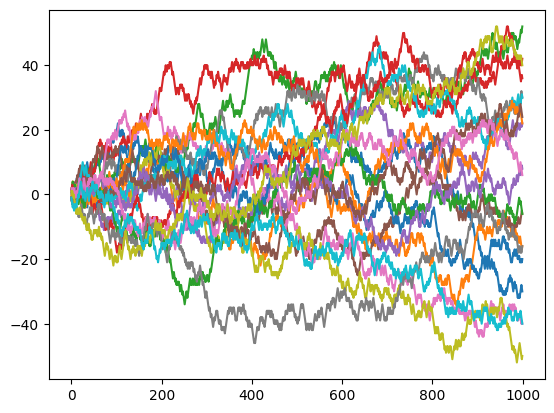

In [99]:
for i in range(nwalks):
    plt.plot(W[i, :])

### Ridge-Regression Closed Form

In [96]:
df = pd.read_csv("mock_data/correlated.csv")
X, y = df.drop(columns=['target']).to_numpy(), df['target'].to_numpy()

In [102]:
X = df.drop(columns=['target']).to_numpy()
y = df['target'].to_numpy()

In [ ]:
ones_vector = np.ones_like(y)
X = np.column_stack((ones_vector, X))

In [ ]:
l = 0.2
w_ridge = np.linalg.inv(X.T @ X + l * np.eye(13)) @ X.T @ y
w_ridge